In [1]:
import pandas as pd
import numpy as np
from utils import *
from data_processing import *
import matplotlib.pyplot as plt
import pathlib

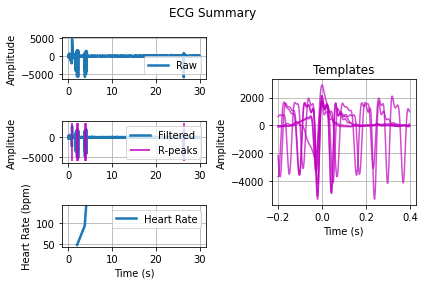

In [152]:
import biosppy
import pyhrv.tools as tools


#ecg_signal = load_ecg("training/train_ecg_00001.mat")
ecg_signal = load_ecg("training/train_ecg_05610.mat")

from heartpy.filtering import hampel_filter, hampel_correcter, smooth_signal


'''
ecg_signal = hampel_filter(ecg_signal, filtsize = 50)
ecg_signal = hampel_correcter(ecg_signal, 300)
'''

signal, rpeaks, _, templates = biosppy.signals.ecg.ecg(ecg_signal, show=True, sampling_rate=418)[1:5]

nni = tools.nn_intervals(rpeaks)

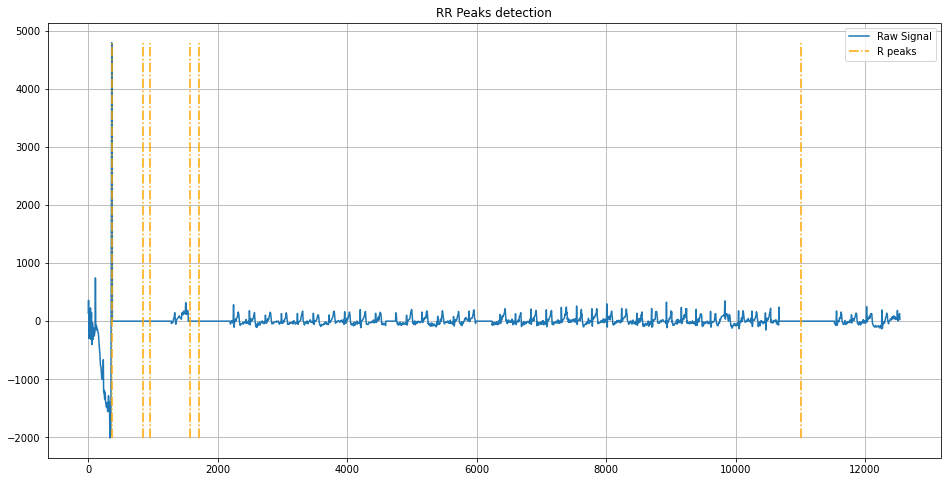

In [156]:
plt.figure(1, (16,8))

plt.title("RR Peaks detection")

plt.plot(ecg_signal)

# plot R peaks
plt.vlines(rpeaks, linestyles="dashdot", ymin=ecg_signal.min(), ymax=ecg_signal.max(), colors="orange")

plt.grid()

plt.legend(["Raw Signal", "R peaks"])


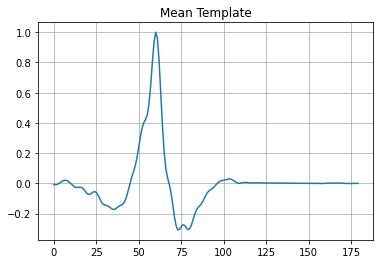

In [65]:
mean_template = np.mean(templates[:], axis=0)
mean_template = mean_template/mean_template.max() # normalize
plt.title("Mean Template")
plt.plot(mean_template)
plt.grid()

In [66]:
templates = templates / templates.max()

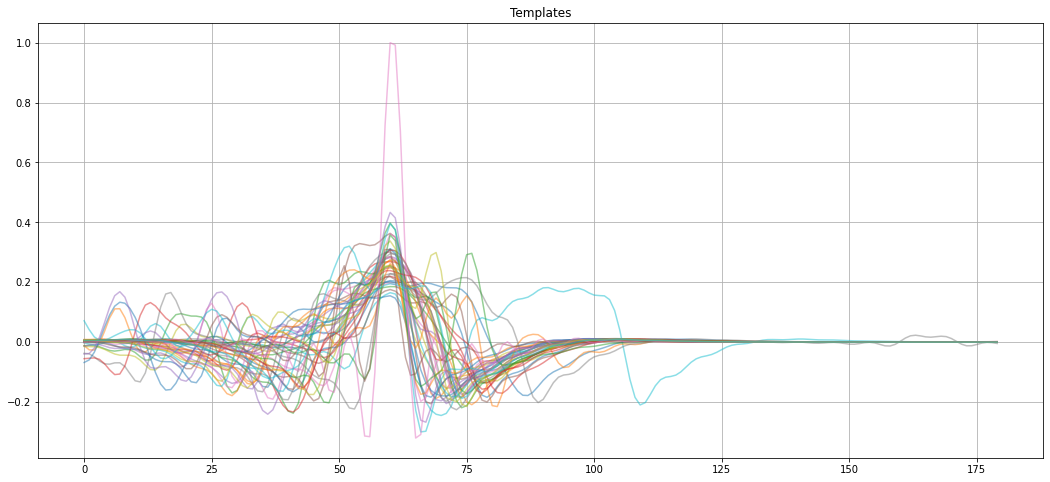

In [67]:
plt.figure(1, (18, 8))
plt.title("Templates")
plt.plot(np.transpose(templates[:]), alpha=0.5)
plt.grid()

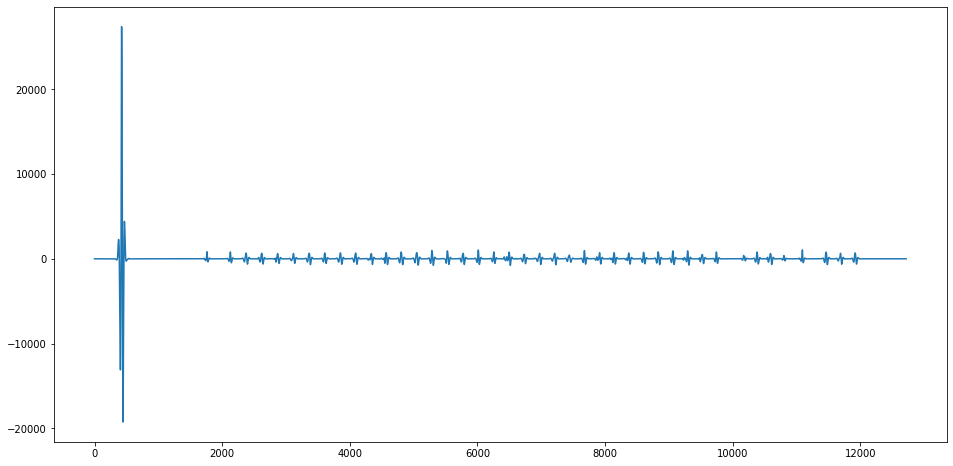

In [68]:
import scipy
plt.figure(1, (16,8))
plt.plot(scipy.signal.oaconvolve(signal,mean_template, mode="full"))

(array([[2.92954176e+01, 2.39371628e+03, 3.38121753e+03, ...,
         2.68355029e+00, 5.10598113e+00, 1.59067206e-01],
        [3.80541203e+01, 8.63079323e+02, 1.44285645e+04, ...,
         5.16434387e+00, 1.58639374e+01, 8.36543554e+00],
        [2.27866569e+02, 4.08966266e+02, 3.03913638e+04, ...,
         1.18523684e+00, 1.56919773e+01, 9.65515312e+00],
        ...,
        [2.97424023e-10, 2.71395773e-11, 5.31163596e-11, ...,
         9.24028457e-13, 2.84977066e-12, 1.30174331e-13],
        [2.91631756e-10, 2.79712536e-11, 5.17865751e-11, ...,
         8.49634952e-13, 2.61915453e-12, 1.15844047e-13],
        [1.48800865e-10, 1.33120956e-11, 2.64358019e-11, ...,
         4.85009624e-13, 1.34931112e-12, 5.53441821e-14]]),
 array([  0.      ,   1.171875,   2.34375 ,   3.515625,   4.6875  ,
          5.859375,   7.03125 ,   8.203125,   9.375   ,  10.546875,
         11.71875 ,  12.890625,  14.0625  ,  15.234375,  16.40625 ,
         17.578125,  18.75    ,  19.921875,  21.09375 ,  22.2

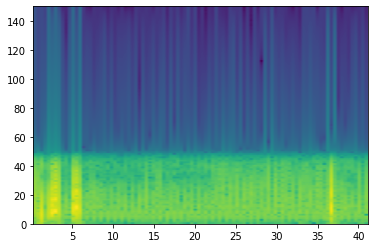

In [27]:
plt.specgram(signal, Fs=300)

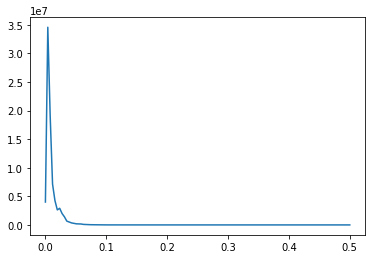

In [35]:
psd_f, psd = scipy.signal.welch(ecg_signal)# power spectral density
plt.plot(psd_f, psd)

In [52]:
LF = [0.05, 0.15] # low frequency band
HF = [0.15, 0.4] # high frequency band

In [54]:
psd_f_lf = psd_f[(psd_f > LF[0]) & (psd_f <= LF[1])]
psd_lf = psd[(psd_f > LF[0]) & (psd_f <= LF[1])]

In [56]:
psd_f_hf = psd_f[(psd_f > HF[0]) & (psd_f <= HF[1])]
psd_hf = psd[(psd_f > HF[0]) & (psd_f <= HF[1])]

In [58]:
LF_power = np.trapz(psd_lf, psd_f_lf)
HF_power = np.trapz(psd_hf, psd_f_hf)

In [59]:
LF_power

3384.152152776718

In [60]:
HF_power

3.2429114799015224

In [69]:
def calculate_spectral_powers(signal: np.array, LF: np.array = [0.05, 0.15], HF: np.array = [0.15, 0.4]):
    psd_f, psd = scipy.signal.welch(signal) # power spectral density

    psd_f_lf = psd_f[(psd_f > LF[0]) & (psd_f <= LF[1])]
    psd_lf = psd[(psd_f > LF[0]) & (psd_f <= LF[1])]
    
    psd_f_hf = psd_f[(psd_f > HF[0]) & (psd_f <= HF[1])]
    psd_hf = psd[(psd_f > HF[0]) & (psd_f <= HF[1])]

    total_power = np.trapz(psd, psd_f)

    LF_power = np.trapz(psd_lf, psd_f_lf) # low frequency band
    HF_power = np.trapz(psd_hf, psd_f_hf) # high frequency band

    return LF_power/total_power, HF_power/total_power, LF_power/HF_power

In [70]:
calculate_spectral_powers(ecg_signal)

(0.309650433494153, 0.0002967268905775246, 1043.5536627350325)

In [71]:
calculate_spectral_powers(signal)

(0.309650433494153, 0.0002967268905775246, 1043.5536627350325)